In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

In [156]:
# # fortran compile
# compile_command = "gfortran -o test2.exe dvode_f90_m.F90 master_module.F90 zdplaskin_m.F90 master_code.F90 bolsig_x86_64_g.dll"
# run_command = "test2.exe"

In [157]:
# # compile 실행
# compile_process = subprocess.run(compile_command, shell=True, check=True, capture_output=True, text=True)
# print("컴파일 완료")

In [158]:
# try:
#     run_process = subprocess.run(run_command, shell=True, check=True, capture_output=True, text=True)
#     print("실행 완료")
# except subprocess.CalledProcessError as e:
#     print(f"실행 중 오류 발생: {e}")
#     print(f"표준 출력: {e.stdout}")
#     print(f"표준 에러: {e.stderr}")

In [159]:
conditions_path = 'qt_conditions.txt'

df_cond = pd.read_csv(conditions_path,
                 delim_whitespace=True,
                 header=0)

conditions_columns = ['Time_s', 'Reduced field_Td', 'Gas temperature_K', 'Electron temperature_eV', 'Current density_A/cm2', 'Power density_W/cm3']

df_cond.columns = conditions_columns
df_cond['Electron temperature_eV'] = df_cond['Electron temperature_eV']/11604.518
df_cond['Mean Electron Energy_eV'] = df_cond['Electron temperature_eV']*1.5

In [160]:
df_cond

,Time_s,Reduced field_Td,Gas temperature_K,Electron temperature_eV,Current density_A/cm2,Power density_W/cm3,Mean Electron Energy_eV
0,0.000000e+00,0.00000,400.0,0.000000,0.000000e+00,0.000000e+00,0.000000
1,1.000000e-09,0.00000,400.0,0.034470,0.000000e+00,0.000000e+00,0.051705
2,3.000000e-09,0.21404,400.0,0.769502,3.240800e-14,1.272700e-12,1.154253
3,7.000000e-09,0.64211,400.0,1.211339,4.920200e-14,5.796500e-12,1.817008
4,1.500000e-08,1.49820,400.0,1.938986,5.633300e-14,1.548500e-11,2.908479
...,...,...,...,...,...,...,...
1618,9.829000e-06,18.39800,400.0,3.728117,4.294300e-11,1.449600e-07,5.592175
1619,9.841000e-06,17.11600,400.0,3.706143,3.984700e-11,1.251300e-07,5.559214
1620,9.857000e-06,15.40600,400.0,3.677964,3.584800e-11,1.013200e-07,5.516946
1621,9.884000e-06,12.51900,400.0,3.625054,2.926800e-11,6.722300e-08,5.437580


In [161]:
density_path = 'qt_densities.txt'

df_den = pd.read_csv(density_path,
                 delim_whitespace=True,
                 header=0)

den_list= []

with open('qt_species_list.txt', 'r') as file:
    for line in file:
        den_list.append(line.split()[-1])

density_columns = ['Time_s'] + den_list
df_den.columns = density_columns

In [162]:
df_den

,Time_s,E,AR,AR*,AR^+,E(W),AR(W)^+
0,0.000000e+00,1.00000,1.834700e+19,0.000000e+00,1.00000,0.0,0.0
1,1.000000e-09,1.00000,1.834700e+19,0.000000e+00,1.00000,0.0,0.0
2,3.000000e-09,1.00000,1.834700e+19,0.000000e+00,1.00000,0.0,0.0
3,7.000000e-09,0.99999,1.834700e+19,0.000000e+00,0.99999,0.0,0.0
4,1.500000e-08,0.99999,1.834700e+19,0.000000e+00,0.99999,0.0,0.0
...,...,...,...,...,...,...,...
1618,9.829000e-06,142.36000,1.834700e+19,1.847600e+09,142.36000,0.0,0.0
1619,9.841000e-06,140.88000,1.834700e+19,1.846400e+09,140.88000,0.0,0.0
1620,9.857000e-06,139.46000,1.834700e+19,1.844800e+09,139.46000,0.0,0.0
1621,9.884000e-06,138.04000,1.834700e+19,1.842000e+09,138.04000,0.0,0.0


C:\Users\bsjun\AppData\Local\Temp\ipykernel_10652\2405343444.py:52: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\bsjun\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


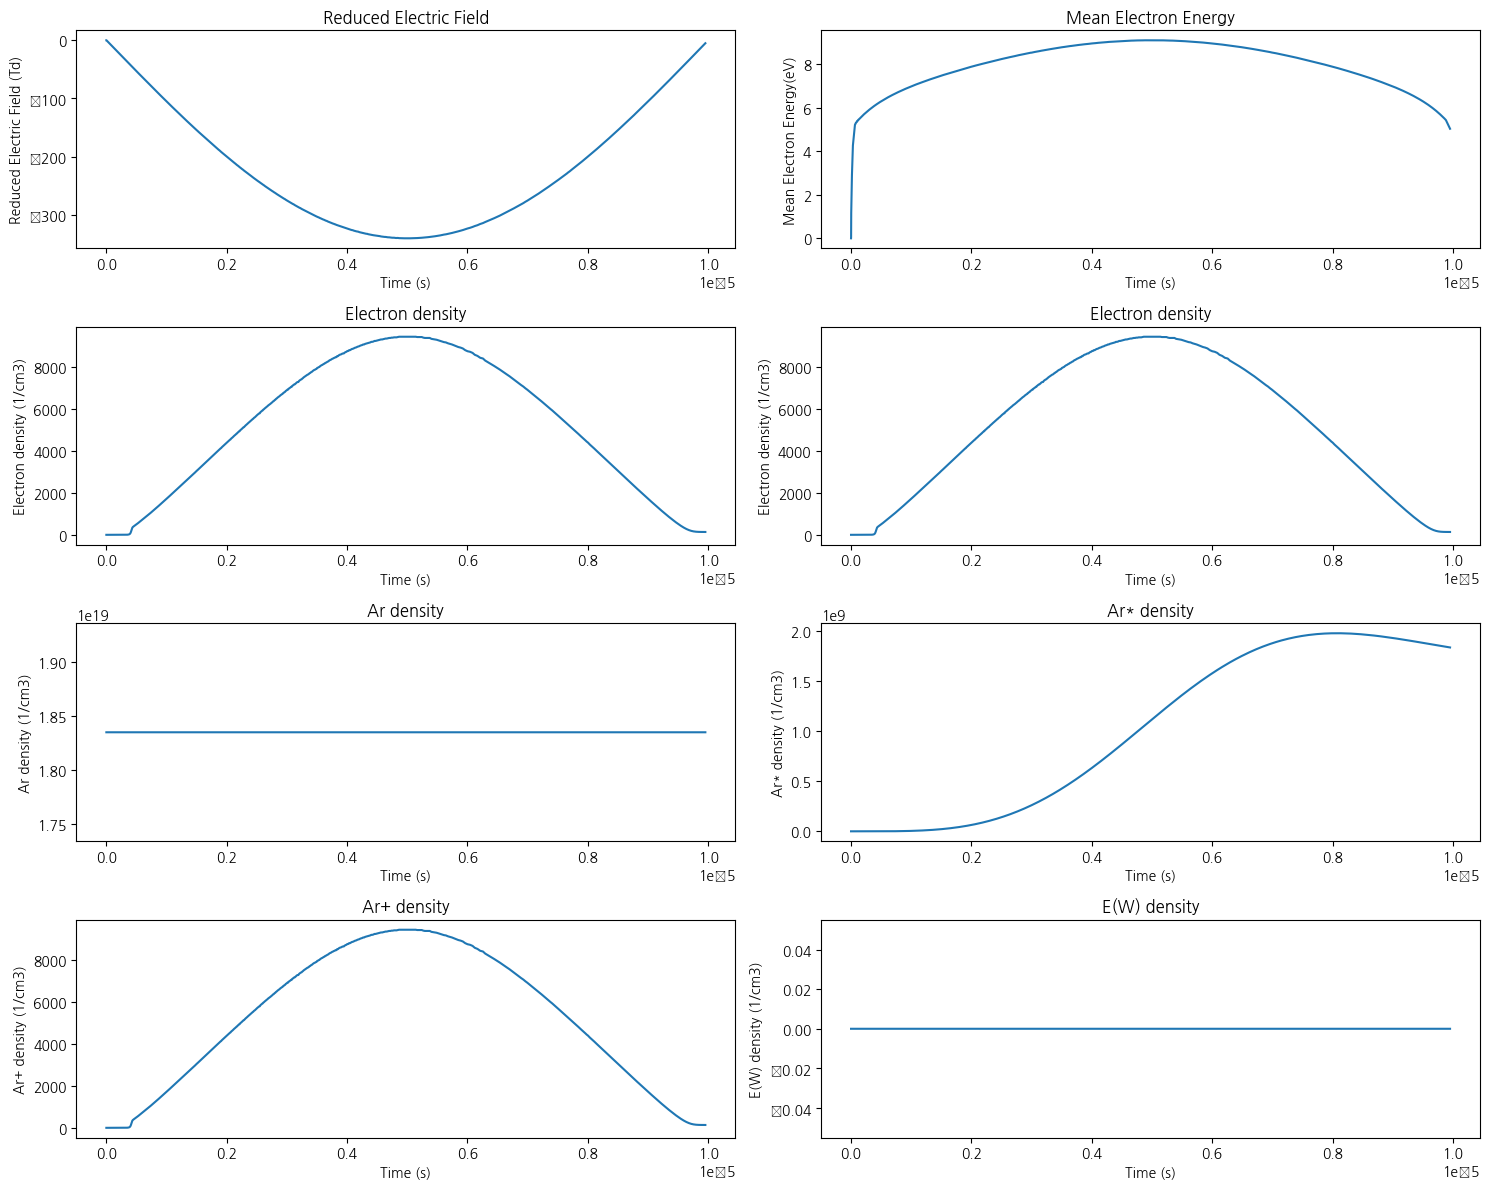

In [163]:
# 결과 플로팅
plt.figure(figsize=(15, 12))

plt.subplot(421)
plt.plot(df_cond['Time_s'], df_cond['Reduced field_Td'])
plt.title('Reduced Electric Field')
plt.xlabel('Time (s)')
plt.ylabel('Reduced Electric Field (Td)')

plt.subplot(422)
plt.plot(df_cond['Time_s'], df_cond['Mean Electron Energy_eV'])
plt.title('Mean Electron Energy')
plt.xlabel('Time (s)')
plt.ylabel('Mean Electron Energy(eV)')

plt.subplot(423)
plt.plot(df_den['Time_s'], df_den['E'])
plt.title('Electron density')
plt.xlabel('Time (s)')
plt.ylabel('Electron density (1/cm3)')

plt.subplot(424)
plt.plot(df_den['Time_s'], df_den['E'])
plt.title('Electron density')
plt.xlabel('Time (s)')
plt.ylabel('Electron density (1/cm3)')

plt.subplot(425)
plt.plot(df_den['Time_s'], df_den['AR'])
plt.title('Ar density')
plt.xlabel('Time (s)')
plt.ylabel('Ar density (1/cm3)')

plt.subplot(426)
plt.plot(df_den['Time_s'], df_den['AR*'])
plt.title('Ar* density')
plt.xlabel('Time (s)')
plt.ylabel('Ar* density (1/cm3)')

plt.subplot(427)
plt.plot(df_den['Time_s'], df_den['AR^+'])
plt.title('Ar+ density')
plt.xlabel('Time (s)')
plt.ylabel('Ar+ density (1/cm3)')

plt.subplot(428)
plt.plot(df_den['Time_s'], df_den['E(W)'])
plt.title('E(W) density')
plt.xlabel('Time (s)')
plt.ylabel('E(W) density (1/cm3)')

plt.tight_layout()
plt.show()

In [164]:
df.columns

NameError: name 'df' is not defined